# <center>Practice 01. Введение</center>

Будем использовать **pygraphblas** -- реализацию стандарта GraphBLAS на питоне, которая основывается на Си реализации **SuiteSparse:GraphBLAS**. Для понимания математических основ стандарта GraphBLAS читайте [Mathematical Foundations of the GraphBLAS](https://people.eecs.berkeley.edu/~aydin/GraphBLAS-Math.pdf). Для понимания GraphBLAS C API и деталей реализации, на которой основывается реалзиация pygraphblas, читайте [SuiteSparse:GraphBLAS User Guide](https://github.com/DrTimothyAldenDavis/GraphBLAS/blob/stable/Doc/GraphBLAS_UserGuide.pdf).

Для начала подлкючаем необходимые методы из **pygraphblas**, предварительно скачав его и другие библиотеки, которые необходимы для отрисовки (например, **graphviz**).

In [1]:
from pygraphblas import *
from pygraphblas.gviz import draw_graph, draw_matrix_op, draw_graph_op

Матрицы могут создаваться различными способами, например, для их построения можно использовать списки, как показано в примере, состоящем из трех списков: списка исходящих вершин, списка входящих вершин и списка весов на ребрах. Первые два списка должны состоять из целых чисел, и pygraphblas автоматически создает матрицу нужного типа на основе типа значений в третьем списке, в данном случае также целых чисел:

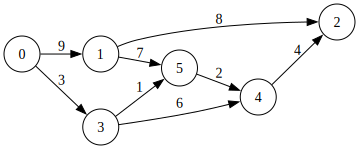

In [2]:
A = Matrix.from_lists(
    [0, 0, 1, 3, 3, 4, 1, 5],
    [1, 3, 2, 4, 5, 2, 5, 4],
    [9, 3, 8, 6, 1, 4, 7, 2],)

draw_graph(A)

## Поэлементное сложение
Сложение двух матриц с помощью оператора плюс (+) приводит к объединению двух графов в объединение их форм, оператор объединения используется, когда оба операнда имеют общее ребро. По умолчанию используется оператор `graphblas.plus`, который складывает два веса, но в GraphBLAS существует множество бинарных операторов, которые могут быть использованы.

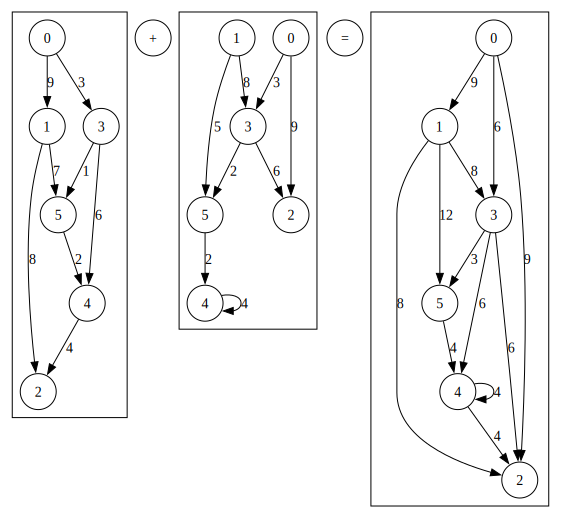

In [3]:
B = Matrix.from_lists(
    [0, 0, 1, 3, 3, 4, 1, 5],
    [2, 3, 3, 2, 5, 4, 5, 4],
    [9, 3, 8, 6, 2, 4, 5, 2],)

C = A + B
draw_graph_op(A, '+', B, C)

## Поэлементное сложение с нестандартным оператором

Для указания другого оператора объединения при поэлементном сложении можно использовать синтаксис `with`, и внутри этого блока будет использоваться указанный оператор.

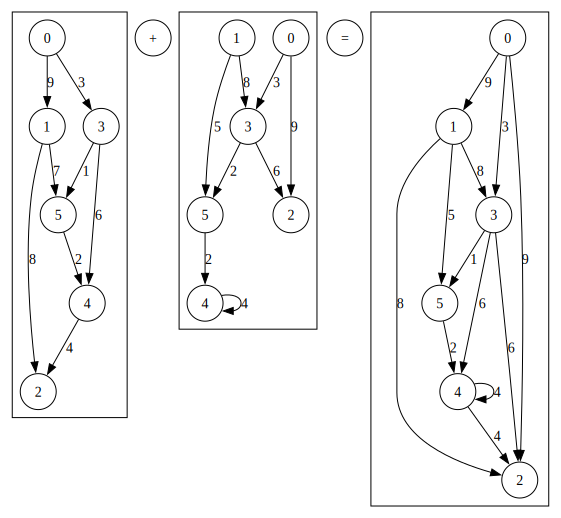

In [4]:
with UINT64.MIN:
    C = A + B
draw_graph_op(A, '+', B, C)

## Поэлеметное умножение

Перемножение двух матриц с помощью оператора "звезда" -- это поэлементное умножение, которое возвращает только пересечение общих ребер в двух графах. Обратите внимание, что это отличается от поэлементного сложения, которое даёт объединение. При этом оперируются только общие для двух графов рёбра. По умолчанию используется оператор `graphblas.times`, который перемножает веса на рёбрах.

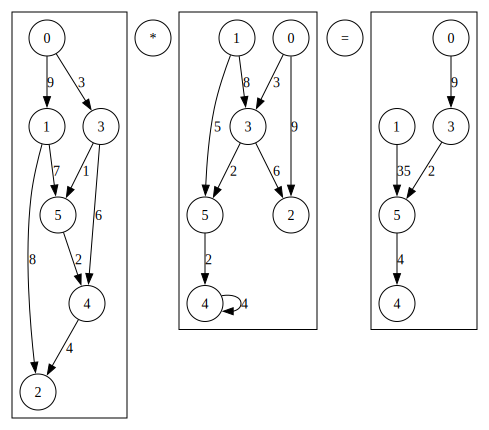

In [5]:
C = A * B
draw_graph_op(A, '*', B, C)

## Поэлементное умножение с нестандартным оператором

Как и при сложении, при поэлементном умножении могут использоваться различные операторы с помощью синтаксиса `with`.

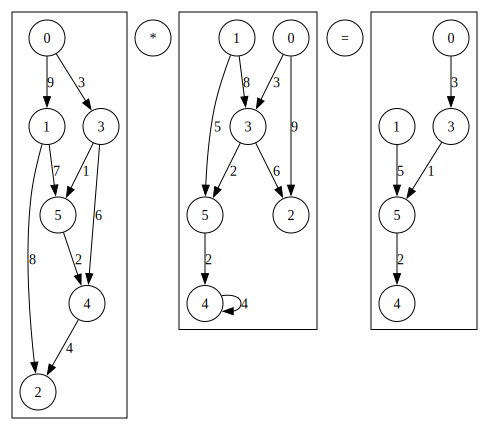

In [6]:
with INT64.MIN:
    C = A * B

draw_graph_op(A, '*', B, C)

##  Умножение матрицы на вектор

Матрицы можно умножать справа на векторы, что аналогично шагу в обратную сторону в BFS от вершин, указанных в правом операнде.

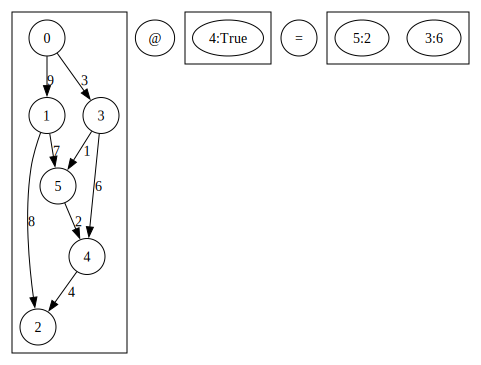

In [7]:
v = Vector.from_lists([4],[True], A.nrows)

draw_graph_op(A, '@', v, A @ v)

Для BFS в обычном направлении, выполняющему матрично-векторное умножение, следует использовать транспонирование входной матрицы:

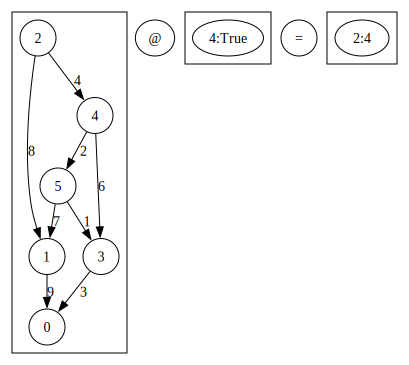

In [8]:
draw_graph_op(A.transpose(), '@', v, A.transpose() @ v)

## Умножение вектора на матрицу

Вектор может быть умножен слева на матрицу. Это основной шаг в BFS, результатом которого являются ребра, смежные с входными. Математически это идентично операции `A.tranpose() @ v`, показанной выше.

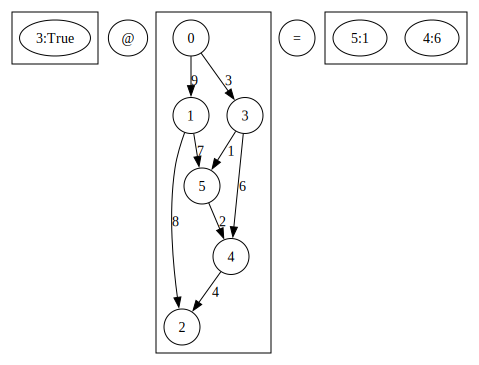

In [9]:
v = Vector.from_lists([3],[True], A.nrows)

y = v @ A
draw_graph_op(v, '@', A, y)

## Умножение матрицы на вектор-строку или вектор-столбец

Сами вектора в pygraphblas не делятся на вектор-строки или столбцы. Av == vA^T, поэтому выбор направления зависит от стиля и задачи. Однако полезно помнить о таких эквивалентах:

In [10]:
(A @ v == v @ A.transpose()).reduce_bool() and (v @ A == A.transpose() @ v).reduce_bool()

True

## Умножение матриц

Оператор матричного умножения (@) используется для перемножения двух матриц. Общей схемой является умножение строк левого операнда на столбцы правого операнда с последующим суммированием результатов. В приведенном ниже результате матрица A будет умножена на саму себя. Такое возведение матрицы смежности в квадрат часто используется для нахождения графа [друзей друзей](https://en.wikipedia.org/wiki/Friend_of_a_friend), где ребра результата соединяют вершины с вершинами, находящимися на расстоянии двух шагов:

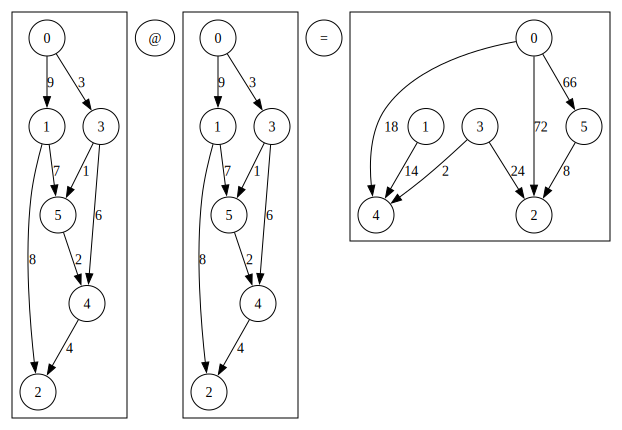

In [11]:
draw_graph_op(A, '@', A, A @ A)

## Стандартные полукольца

Для получения различных результатов при умножении матриц можно использовать различные стандартные полукольца. Полукольцо определяет два бинарных оператора, которые заменяют операцию умножения элементов матриц и операцию сложения. В следующем примере используется встроенное полукольцо `min_plus`.

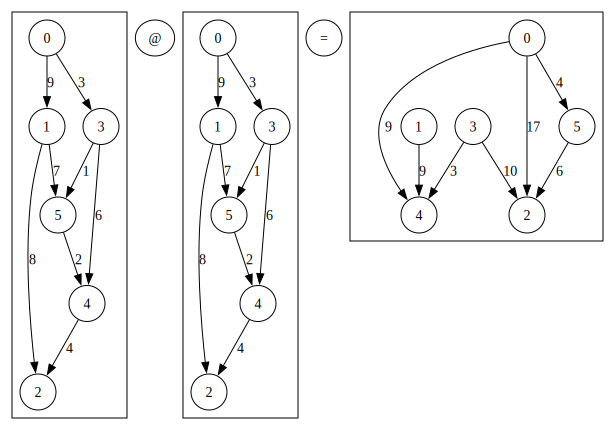

In [12]:
draw_graph_op(A, '@', A, A.min_plus(A))

## Транспонирование матрицы

Матрица может быть транспонирована с помощью метода `transpose()`. Это эффективно меняет направление ребер в графе.

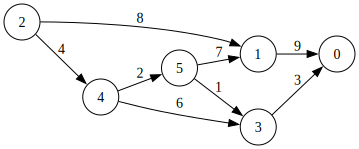

In [13]:
draw_graph(A.transpose())

## Симметричные графы

При добавлении к графу его транспонированной версии он становится симметричным, каждое ребро имеет соответствующее обратное ребро.

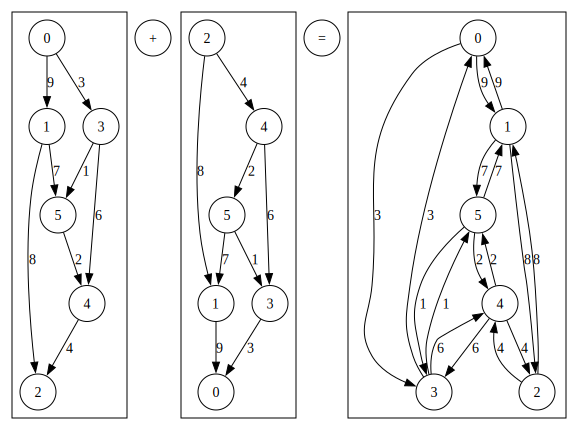

In [14]:
draw_graph_op(A, '+', A.transpose(), A + A.transpose())

## Случайные графы

Случайные графы могут быть построены с помощью метода `random` класса `Matrix`.

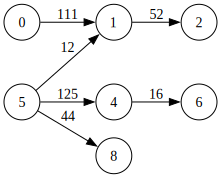

In [18]:
draw_graph(Matrix.random(UINT8, 6,6,10, no_diagonal=True, seed=42), weights=True)